# In this file, I want to do more analysis to show my visualization and machine learning skill. I still use the same dataset, which could be found: https://ffiec.cfpb.gov/v2/data-browser-api/view/csv?states=CA&years=2023

### Author: Xingjian (James) Tian

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Extra Practice (Visualization)

### Question: Based on the dataset (used in HDFS), create a visualization to analyze the relationship between the applicant's income and the loan amount for approved and denied loan applications. Use a scatter plot with different colors to distinguish between approved and denied loans.

Note: In this question, the dataset contains a very large number of data points, making it challenging to visualize meaningful patterns in a scatter plot. So I decided to randomly selected 10% data points to plot, try to find some interesting result. 

In [2]:
# Read the File
# Choose several columns we need
df = pd.read_csv(
    '/Users/xingjiantian/Documents/Project for letters of recommendation/state_CA.csv',
    usecols=[
        "action_taken",
        "income",
        "loan_amount",
    ]
)
df = df.dropna()
df

,action_taken,loan_amount,income
478,1,105000.0,100.0
479,4,65000.0,112.0
480,4,105000.0,64.0
481,1,105000.0,74.0
482,1,35000.0,191.0
...,...,...,...
946033,3,215000.0,136.0
946034,3,505000.0,480.0
946035,1,75000.0,211.0
946036,5,505000.0,166.0


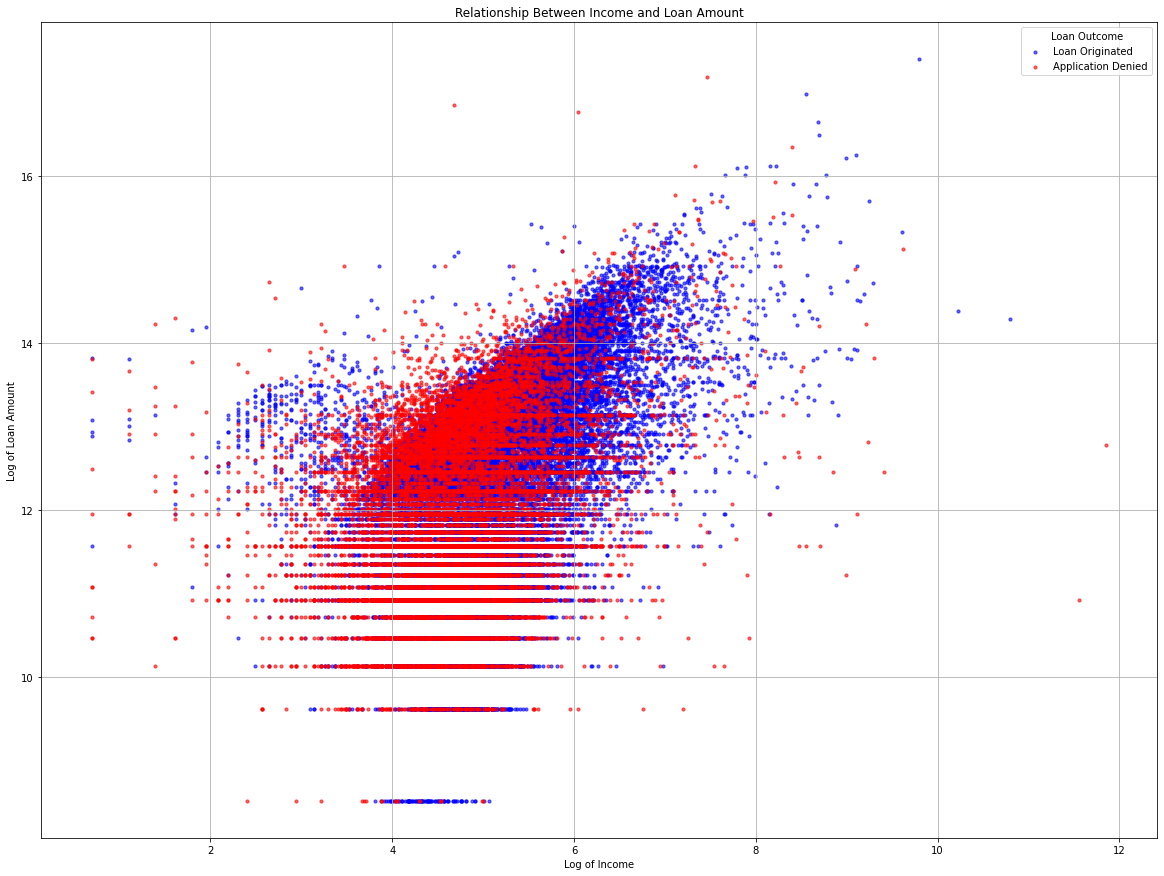

In [3]:

# Filter only the rows with action_taken = 1 (Loan originated) or 3 (Application denied)
df = df[df['action_taken'].isin([1, 3])].copy()
# Drop rows where values are <= 0 to avoid divide by zero issue
df = df[(df['income'] > 0) & (df['loan_amount'] > 0)] 


# cited from https://stackoverflow.com/questions/49538185/purpose-of-numpy-log1p to avoid log(0)
df['log_income'] = np.log1p(df['income']) 
df['log_loan_amount'] = np.log1p(df['loan_amount'])


df['action_taken_label'] = df['action_taken'].map({1: 'Loan Originated', 3: 'Application Denied'})

# Randomly sample 10% of the data for better visualization
df_sample = df.sample(frac=0.1, random_state=42)

# Plot the scatter plot with log scale
plt.figure(figsize=(20, 15))
colors = {'Loan Originated': 'blue', 'Application Denied': 'red'}
for label, color in colors.items():
    subset = df_sample[df_sample['action_taken_label'] == label]
    plt.scatter(
        subset['log_income'], 
        subset['log_loan_amount'], 
        label=label, 
        color=color, 
        alpha=0.6, 
        s=10
    )

plt.title("Relationship Between Income and Loan Amount")
plt.xlabel("Log of Income")
plt.ylabel("Log of Loan Amount")
plt.legend(title="Loan Outcome")
plt.grid(True)
plt.show()

### Observation

1. We could find that there is a positive correlation between income and loan amount for both approved and denied loans. Applicants with higher incomes tend to apply for and receive larger loan amounts.
2. Denied applications (red points) are scattered across the entire plot. This suggests that denial decisions may not be solely dependent on income or loan amount but might be influenced by other factors not captured in this project.
3. Approved applications (blue points) tend to cluster more tightly, particularly in the mid to high ranges of income and loan amounts. This indicates that applicants with medium to high incomes and corresponding loan amounts are more likely to receive loan approval.

### Conclusion and Next Steps
Back to the question, what is the relationship between the applicant's income and loan amount for approved and denied loans?
We found that approved loans have a clear positive relationship exists, with higher incomes corresponding to higher loan amounts.
For denied loans,the relationship is less clear, with significant variability suggesting that denial decisions involve additional considerations beyond income and loan amount.

The next research step may be to incorporate the additional variables, address some outliers, or using more advanced model to solve. 

# Extra Practice (Machine learning)

### Question: Based on the dataset (used in HDFS), predict whether a loan application will be approved or denied based on the some features using a classification machine learning model.

In [4]:
# Read the File
# Choose several columns to finish the problem for simplicity. 
df = pd.read_csv(
    '/Users/xingjiantian/Documents/Project for letters of recommendation/state_CA.csv',
    usecols=[
        "action_taken",
        "derived_ethnicity",
        "derived_race",
        "derived_sex",
        "income",
        "debt_to_income_ratio",
        "loan_amount",
        "interest_rate"
    ]
)


df


/var/folders/1b/d7r5ttws2_51k670gmcc7w7m0000gn/T/ipykernel_33908/364149490.py:3: DtypeWarning: Columns (23,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,derived_ethnicity,derived_race,derived_sex,action_taken,loan_amount,interest_rate,income,debt_to_income_ratio
0,Ethnicity Not Available,Race Not Available,Sex Not Available,6,245000.0,6.0,NaN,NaN
1,Ethnicity Not Available,Race Not Available,Sex Not Available,6,525000.0,6.0,NaN,NaN
2,Ethnicity Not Available,Race Not Available,Sex Not Available,6,325000.0,6.375,NaN,NaN
3,Ethnicity Not Available,Race Not Available,Sex Not Available,6,225000.0,5.5,NaN,NaN
4,Ethnicity Not Available,Race Not Available,Sex Not Available,6,205000.0,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...
946110,Ethnicity Not Available,Race Not Available,Sex Not Available,6,335000.0,5.875,NaN,NaN
946111,Ethnicity Not Available,Race Not Available,Sex Not Available,6,245000.0,5.5,NaN,NaN
946112,Ethnicity Not Available,Race Not Available,Sex Not Available,6,205000.0,6.125,NaN,NaN
946113,Ethnicity Not Available,Race Not Available,Sex Not Available,6,315000.0,6.0,NaN,NaN


In [5]:
# Filter only the rows with action_taken = 1 (Loan originated) or 3 (Application denied)
df = df[df['action_taken'].isin([1, 3])]

# Remove rows with "Not Available" or "Free Form Text Only" in the selected variables
df = df[~df['derived_ethnicity'].isin(['Ethnicity Not Available', 'Free Form Text Only'])]
df = df[~df['derived_race'].isin(['Race Not Available', 'Free Form Text Only'])]
df = df[~df['derived_sex'].isin(['Sex Not Available'])]

# Encode categorical variables to ensure all columns are numeric
df = pd.get_dummies(df, columns=['derived_ethnicity', 'derived_race', 'derived_sex'], drop_first=True)

# Drop any remaining non-numeric columns (if any exist) and ensure numeric format
df = df.select_dtypes(include=['float64', 'int64', 'uint8'])

print(f"Filtered dataset shape: {df.shape}")


X = df.drop(['action_taken'], axis=1)
y = df['action_taken']

# Split data into training, testing sets(10% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

# Combine X_train and y_train to drop rows with NAs values in any column
train_data = pd.concat([X_train, y_train], axis=1)
train_data = train_data.dropna()

# Separate X_train and y_train after dropping NAs rows
X_train = train_data.drop(columns=['action_taken'])  
y_train = train_data['action_taken'] 

# Drop NAs values from X_test and y_test
test_data = pd.concat([X_test, y_test], axis=1)
test_data = test_data.dropna()
X_test = test_data.drop(columns=['action_taken']) 
y_test = test_data['action_taken']


clf = RandomForestClassifier(random_state=220) # Random Forest Classifier
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


print("\nClassification Report: \n", classification_report(y_test, y_pred))


Filtered dataset shape: (416330, 13)
Confusion Matrix: 
 [[25647  4581]
 [ 6759  3585]]

Classification Report: 
               precision    recall  f1-score   support

           1       0.79      0.85      0.82     30228
           3       0.44      0.35      0.39     10344

    accuracy                           0.72     40572
   macro avg       0.62      0.60      0.60     40572
weighted avg       0.70      0.72      0.71     40572



### Data Shape 
The filtered dataset contains 416,330 rows and 13 columns, meaning this dataset is sufficiently large for training and evaluation.

### Confusion Matrix: 

The confusion matrix provides the following results:

True Positives (1 - Loan Originated): 25,647 correctly predicted as loan originated.

False Negatives (1): 4,581 actual loan originated but predicted as application denied.

False Positives (3 - Application Denied): 6,759 actual application denied but predicted as loan originated.

True Negatives (3): 3,585 correctly predicted as application denied

For class 1 (Loan Originated), the **precision** will be 25647/(25647+6759) = 0.79, which means when the model predicts that the loan is originated, 79% of the time the model is right. 

The **recall** for class 1 (Loan Originated) is 25647/(25647+4581) = 0.85, which means when the loan is actually originated, 85% of the time the model is right. 

For class 3 (Application Denied), the **precision** will be 3585/(3585+4581) = 0.44, which means when the model predicts that the loan application is denied, only 44% of the time the model is right. 

The **recall** for class 3 (Application Denied) is 3585/(3585+6759) = 0.35, which means when the loan application is actually denied, only 35% of the time the model is right. 

So the **F1 Score for class 1(Loan Originated)** is 2*(0.79*0.85)/(0.79+0.85) = 0.82 

The **F1 Score for class 3 (Application Denied)** is 2*(0.44*0.35)/(0.44+0.35) = 0.39

These results indicate that the model performs well for "Loan Originated" predictions but struggles with "Application Denied," with lower precision and recall for the latter. This imbalance might require further model tuning or addressing the class distribution.

### Overall Metrics

**Accuracy**: (25647+3585)/(25647+3585+4581+6759)= 0.72 - The model correctly predicts the target variable 72% of the time. This result is acceptable but not very excellent. Feature selection or an alternative model may improve the predictive power. 

Note: Based on the results now we have, there is no direct evidence of overfitting.

### Discussion
I just chose a few columns to complete the problem for simplicity. If I want to go deeper into analyzing this dataset, I may need to explore additional methods like Lasso or Ridge regression to perform feature selection. These methods can help identify the most important variables by either shrinking the coefficients of less significant features (Ridge) or setting some coefficients to zero (Lasso), effectively selecting relevant features. This would allow me to construct a more robust and interpretable model, ensuring that the chosen features contribute meaningfully to the target variable.